In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [75]:
class Normal:
    def __init__(self, mu, var):
        self.mu = mu
        self.std = np.sqrt(var)
    
    # return likelihood N(x|mu, var)
    def pdf(self, x):
        return norm.pdf(x, self.mu, self.std)
    
    def sample(self, size):
        return norm.rvs(size=size) * self.std + self.mu    

In [76]:
# unnormalized real distribution : N(z|-1, 1) * 0.2 + N(z|3, 1) * 0.3
def p_tilde(z):
    return norm.pdf(z + 1) * 0.2 + norm.pdf(z - 3) * 0.3

# proposal distribution q(z) = N(0, 4^2)
q_dist = Normal(0, 4)

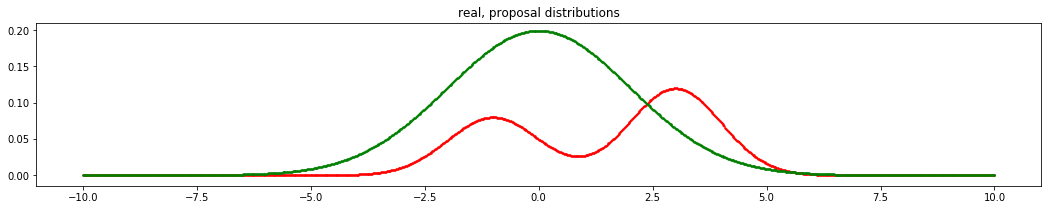

In [77]:
Z = np.linspace(-10, 10, 1000)
p_Z = p_tilde(Z)

# comparison function q(z)
q_Z = q_dist.pdf(Z)

plt.figure(figsize=[18, 3])

plt.title('real, proposal distributions')
plt.scatter(Z, p_Z, s=2, color='red')
plt.scatter(Z, q_Z, s=2, color='green')
plt.show()

In [94]:
# (11.23)
def get_weights(samples, p_tilde, q):
    p_tildes = p_tilde(samples)
    qs = q(samples)
    weights = p_tildes / qs
    return weights / sum(weights)
    
# The number of samples

L = 100000

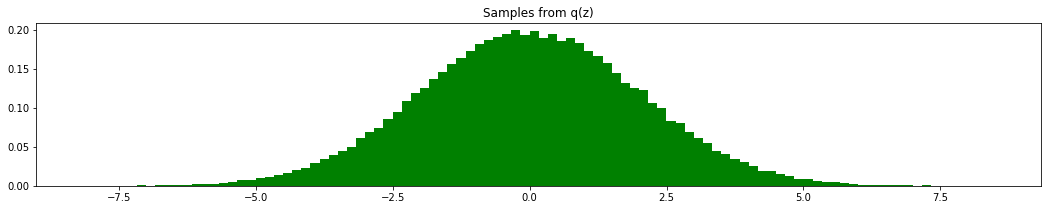

In [96]:
# first stage

samples_from_q = q_dist.sample(L)

plt.figure(figsize=[18, 3])
plt.title('Samples from q(z)')
plt.hist(samples_from_q, bins=100, density=True, color='green')
plt.show()

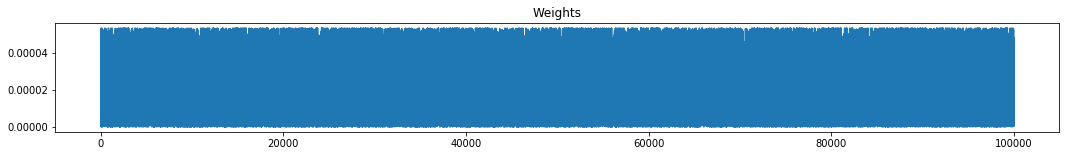

In [97]:
# second stage

weights = get_weights(samples_from_q, p_tilde, q_dist.pdf)

plt.figure(figsize=[18, 2])
plt.title('Weights')
plt.plot(weights)
plt.show()

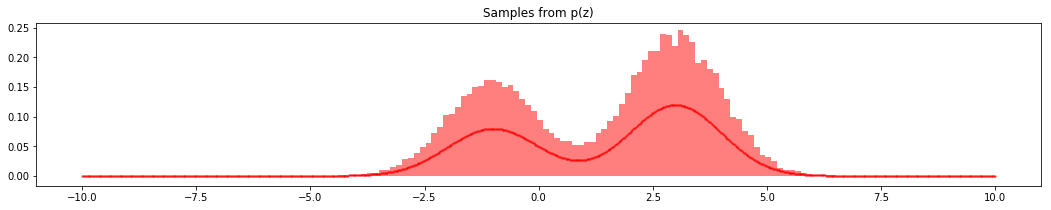

In [98]:
# third stage

samples_from_p = np.random.choice(samples_from_q, size=L, p=weights)

plt.figure(figsize=[18, 3])
plt.title('Samples from p(z)')
plt.scatter(Z, p_Z, s=2, color='red', alpha=0.5)
plt.hist(samples_from_p, bins=100, density=True, alpha=0.5, color='red')
plt.show()